Text(0.5, 0, 'w1')

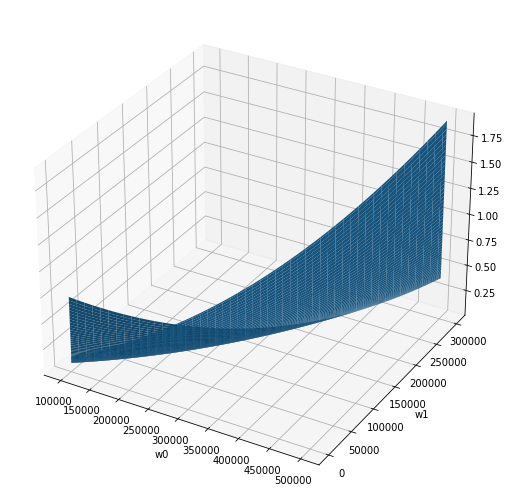

In [1]:
'''
%in this exercise, you will investigate linear regression using gradient descent
% and the normal equations
%This is a training set of housing prices in Portland, Oregon, where 
%y are the prices and the inputs $x are the living area and the number of bedrooms.
%we will use only living area in this assigment
% initialize samples of x and y training dataset
%
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator


x2 = np.loadtxt('ex3x.dat')
y  = np.loadtxt('ex3y.dat') #house cost
#y = y[None].transpose()

x  = x2[:,0][None] #only living area
m = len(y) # store the number of training examples
x = np.hstack((np.ones((m, 1)), x.transpose())) # Add a column of ones to x

#%the area values from your training data are actually in the second column of x
 

#Gradient descent 

#normilze the data
sigma_x = np.std(x)
sigma_y = np.std(y)

mu_x = np.mean(x)
mu_y = np.mean(y)


x[:,1] = (x[:,1] - mu_x)/ sigma_x #normalize squarefoot data

mse = np.zeros((100, 100)) #initialize mse to 100x100 matrix of 0's
w0 = np.linspace(100000,500000,100)
w1 = np.linspace(1000,300000,100)

for i in range(len(w0)):
    for j in range(len(w1)):
        t = np.asarray([w0[i],w1[j]])
        x_train = x@t
        err = y[:] - x_train[:]
        mse[i,j] =1/m*np.dot(err,err) #mean square error as a function of weights
    
    

'''
% Plot the surface plot
% Because of the way meshgrids work in the surf command, we need to 
% transpose mse before calling surf, or else the axes will be flipped
'''
fig = plt.figure(figsize =(14, 9)) 
ax = plt.axes(projection ='3d') 

mse = mse.transpose()
ax.plot_surface(w0, w1, mse)
ax.set_xlabel('w0')
ax.set_ylabel('w1')

w0g w1g
[-1.08693775  1.24375863]
house prediction for 1650s, gradient descent:
293260.8400948661


Text(0.5, 0, 'house sf')

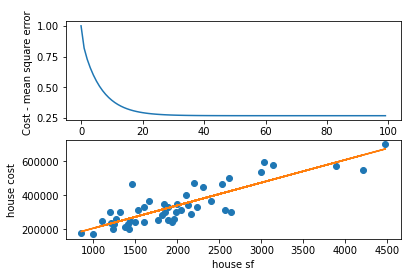

In [3]:
w = [0,0] #vector of weights that gets adjusted as we gradient descent
iterations = 100
alpha = 0.007
cost= np.zeros((iterations,1)) #cost values used to help us minimize
y[:] = (y[:] - mu_y)/sigma_y #normalize data for y

for iter in range(iterations):
#insert your code here
    x_train = x@w
    err = y[:] - x_train[:]
    cost[iter] = 1/m*np.dot(err,err) #mean square error as a function of weights
    
#% this is the code to calculate weights
    grad = x.transpose()@(x_train[:] - y[:])
    w = w - (grad)*alpha
#%end of your code    
    #wdraw0[iter]=w[1]
    #wdraw1[iter]=w[2]
 

print("w0g w1g")
print(w)

'''
 now plot Cost
 technically, the first cost  at the zero-eth iteration
 but Matlab/Octave doesn't have a zero index
'''
plt.subplot(2,1,1)
plt.plot(cost, '-')
plt.xlabel('Number of iterations')
plt.ylabel('Cost - mean square error ')

#normilize 1650sf 
# scaling 1650sf your code here:

newxs = (1650 - mu_x)/sigma_x
print("house prediction for 1650s, gradient descent:")
print(([1,newxs]@w)*sigma_y + mu_y)

yp=x@w
yp = sigma_y*yp[:] + mu_y

xorg= sigma_x*x[:,1] + mu_x
y = sigma_y*y + mu_y

#plot data and regression line
#pltfigure #% open a new figure window
# plot your training set (and label the axes):


plt.subplot(2,1,2)
plt.plot(xorg, y,'o', xorg,yp,'-')
plt.ylabel('house cost')
plt.xlabel('house sf')
#plt.plot(xorg,yp,'-')